# Klasifikační metriky 

Úloha klasifikace je trochu jiná, než úloha regrese, proto má své vlastní metody na posuzování úspěšnosti modelů. 
Projdeme nejdůležitější metriky určené pro klasifikaci.


Abychom mohli metriky rovnou ilustrovat na příkladu, vezměme si na pomoc známou datovou množinu Iris.
Jedná se o klasifikaci květů kostatců, datová množina obsahuje tři třídy Setosa, Versicolor a Virginica.

![iris_data](static/iris_data.png)

Cílem úlohy je vytvořit model -- klasifikátor, který nám pro dané hodnoty kalištních a okvětních lístků vrátí správné zařazení daného vzorku do třídy.

(Data tentokrát nečteme ze souboru, ale použijeme předpřipravená dat z modulu datasets knihovny Scikit-learn). 

In [1]:
from  sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()   # načteme si data, Iris data jsou "vestavěná"
X = iris.data                 # příznaky 
y = iris.target               # třídy (labely)


# rozdělme data na trénovací a testovací 
# random_state určuje inicializaci generátoru náhodných čísel (chceme aby nám to vždy vyšlo stejně) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=314)

# vytvořme klasifikátor 
klasifikator = DecisionTreeClassifier(random_state=314)

# natrénujeme a ohodnotíme testovací množinu 
klasifikator.fit(X_train,y_train)
y_pred = klasifikator.predict(X_test)

Podívejme se, jak predikce vypadají.

In [2]:
print("Příznaky:            Predikovaná třída:  Skutečná třída:")
print("--------------------------------------------------------")
for priznaky, trida_pred, trida_skut in zip(X_test, y_pred, y_test):
    print(priznaky, "   ", trida_pred, "                 ", trida_skut, 
          "                ", "OK" if trida_pred == trida_skut else ":(")

Příznaky:            Predikovaná třída:  Skutečná třída:
--------------------------------------------------------
[5.2 4.1 1.5 0.1]     0                   0                  OK
[5.8 2.7 5.1 1.9]     2                   2                  OK
[4.8 3.  1.4 0.1]     0                   0                  OK
[4.7 3.2 1.3 0.2]     0                   0                  OK
[6.3 2.3 4.4 1.3]     1                   1                  OK
[5.7 2.8 4.5 1.3]     1                   1                  OK
[5.8 2.8 5.1 2.4]     2                   2                  OK
[5.1 3.3 1.7 0.5]     0                   0                  OK
[6.  2.7 5.1 1.6]     2                   1                  :(
[5.6 2.9 3.6 1.3]     1                   1                  OK
[6.3 2.9 5.6 1.8]     2                   2                  OK
[6.3 3.3 6.  2.5]     2                   2                  OK
[6.  2.9 4.5 1.5]     1                   1                  OK
[5.6 2.7 4.2 1.3]     1                   1           

Nejjednodušší co můžeme měřit je procento správných odpovědí. Tomu se říká **accuracy**. 

In [3]:
100 * ((y_pred == y_test).sum() / len(y_test))

90.0

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

## Úkol: 

Představte si, že máte klasifikovat jablka a hrušky. Máte datovou množinu obsahující 100 kusů ovoce. 
Klasifikátor má na této množině úspěšnost 90% (90 kusů je klasifikováno správně). Myslíte, že takový 
klasifikátor je dobrý? 

**Accuracy** nám dává velmi málo informace. Prozradíme si nyní, že v úkolu 
s ovocem bylo 90 kusů jablek a 10 kusů hrušek. Klasifikátor, který vše co dostane označuje
za jablko má tedy na této množině 90% úspěšnost. Nám je ale k ničemu. 

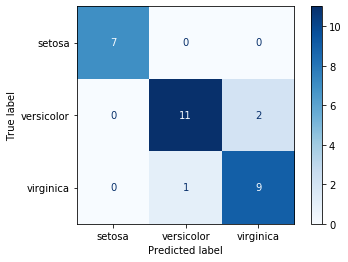

In [5]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

plot_confusion_matrix(klasifikator,     # naučený klasifikátor
                      X_test, y_test,   # data 
                      display_labels=iris.target_names, # jména tříd [lze vynechat]
                      cmap=plt.cm.Blues   # barevná paleta [lze vynechat]
);


TODO: Jak se to jmenuje česky? 
Matice záměn (**confussion matrix**) nám dává daleko více informace. Na obrázku vidím, 
kolik vzorků z třídy dané řádkem bylo klasifikováno do třídy dané sloupcem.

Tedy v našem případě: Jeden vzor typu Virginica byl oklasifikován chybně jako Versicolor, dva vzory typu Versicolor byly oklasifikovány chybně jako Virginica. 

Nyní se podíváme na binární klasifikaci (klasifikaci do dvou tříd). Vezměme si data *breast_cancer*, která obsahují
pozitivní a negativní rakovinové nálezy. 

In [6]:
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

klasifikator = SVC(random_state=0, probability=True)
klasifikator.fit(X_train, y_train)

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

y_pred = klasifikator.predict(X_test)
y_dummy = dummy.predict(X_test)

print("SVC accuracy ", accuracy_score(y_test, y_pred))
print("dummy accuracy ", accuracy_score(y_test, y_dummy))

SVC accuracy  0.9370629370629371
dummy accuracy  0.4755244755244755


/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


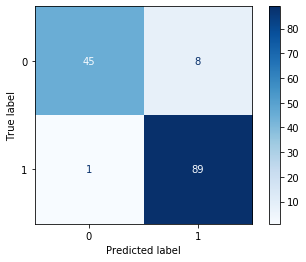

In [7]:
plot_confusion_matrix(klasifikator, X_test, y_test, cmap=plt.cm.Blues);

Třídu 0 označujeme jako negativní, třídu 1 jako positivní. Čtrnáct pozitivních vzorků bylo označeno za negativí, 
takovýmto případům říkáme falešně negativní (**false negative**). Tři negativní vzorky byly označeny jako positivní, 
ty jsou tzv. falešně positivní (**false possitive**). 

Počty falešně positivních a falešně negativních případů jsou pro hodnocení úspěšnosti binární klasifikace zásadní. 
Správně klasifikované vzorky označujeme jako **true possitive** a **true negative**. 

![obrazek_true_false_positive_negative](static/np_small.png)

## Precision, recall, F1 skóre

Klasifikační metrika známá jako **precision** říká, kolik vzorků označených za pozitivních je opravdu pozitivních. 

$$ precision = \frac{TP}{TP+FP} $$

TP označuje počet správně označených pozitivních vzorků (**true possitives**) <br>
FP označuje počet falešně pozitivních vzorků (**false negatives**) 

Metrika **recall** říká, kolik pozitivních vzorků bylo podchyceno klasifikátorem (klasifikováno jako pozitivní).

$$ recall = \frac{TP}{TP+FN} $$ 

FN je počet falešně negativních vzorků (**false negatives**) 

Nesnaž se vzorečky zapamatovat, zamysli se nad tím, co nám říkají. S tím ti pomůže obrázek výše. 

In [8]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", recall_score(y_test, y_pred))

Precision:  0.9175257731958762
Recall:     0.9888888888888889


In [9]:
print("Precision: ", precision_score(y_test, y_dummy))
print("Recall:    ", recall_score(y_test, y_dummy))

Precision:  0.5862068965517241
Recall:     0.5666666666666667


Zda je pro nás důležitější precision nebo recall, záleží na konkrétní úloze. 
Někdy vadí více falešně pozitivní případy (příliš mnoho relevantních mailů označených za spam), 
jindy bude více vadit nezachycený pozitivní případ (neodhalený výskyt nemoci). 

Další často používanou metrikou je tzv. F1 skóre. Kombinuje precision a recall. 

$$ F1 = 2 \frac{precision \cdot recall}{precision + recall}$$

In [10]:
from sklearn.metrics import f1_score

print("F1 skóre:    ", f1_score(y_test, y_pred))

F1 skóre:     0.9518716577540107


## ROC křivka

Další užitečná charakteristika je tzv. ROC křivka. Křivka vyjadřuje kvalitu binárního klasifikátoru v závislosti 
na klasifikačním prahu. 

Co je to klasifikační práh? Představ si, že v úloze na `breast cancer` nebude naučený model vracet hodnoty 0/1 (negativní, pozitivní nález), ale číslo typu `float` udávající pravděpodobnost (nebo nějakou míru) náležení do pozitivní třídy.

V nejjednodušším případě budeš vzorky s pravděpodobností větší než 0.5 klasifikovat jako pozitivní,  ostatní jako negativní. Můžeš ale chtít být opatrná a dovyšetřit i pacienty, kteří mají horší nález, i když ne tak špatný, aby model dával odezvu větší než 0.5. Pak tento práh nebude 0.5, ale např. 0.4. Můžeš být zastánce přístupu "nejhorší je smrt z vystrašení" a rozhodneš se dovyšetřit jen pacienty s opravdu špatným nálezem. Pak nastavíš práh např. na 0.7. Jaký přístup je potřeba záleží na konkrétní situaci. 

ROC křivka zobrazuje vztah mezi pravděpodobností detekce (**true positive rate**, senzitivita, recall) TPR a pravděpodobností falešného poplachu (**false positive rate**) FPR. 

$$ TPR = \frac{TP}{P} = \frac{TP}{TP + FN}$$

$$ FPR = \frac{FP}{N} = \frac{FP}{FP + TN}$$

P, N ... jsou počty všech pozitivních/negativních vzorků 

ROC křivka zobrazuje na ose x pravděpodobnost falešného poplachu, na ose y pravděpodobnost detekce. Toto pro všechny klasifikační prahy. Čím vyšší klasifikační práh, tím nižší pravděpodobnost falešného poplachu i nižší senzitivita. Čím menší klasifikační práh, tím větší pravděpodobnost detekce (senzitivita) i větší nebezpečí falešného poplachu. 

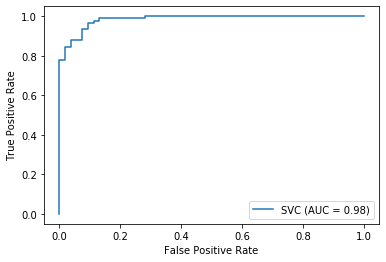

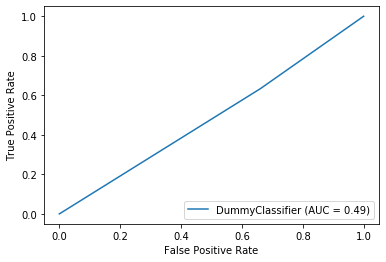

In [11]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(klasifikator, X_test, y_test)
plot_roc_curve(dummy, X_test, y_test);

Hodnota AUC (Area Under the Curve) udává obsah plochy pod křivkou. Čím větší plocha, tím lepší klasifikátor.  